<a href="https://www.kaggle.com/code/ismailelyan/breast-cancer-whos-best-model-accuracy-96?scriptVersionId=198275249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Breast Cancer Detection using Machine Learning
Objective: Predict whether a breast cancer tumor is malignant or benign using various machine learning models and compare their performance.

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Reading the data 

In [2]:
BreastData = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

## Information About the data

In [3]:
BreastData.shape

(569, 33)

In [4]:
BreastData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From the information we can see that the column 'diagnosis' is the only one which is Object<br />
1   diagnosis                569 non-null    object<br />

## Printing all columns 

In [5]:
BreastData_dict = {i: BreastData.columns[i] for i in range(len(BreastData.columns))}
BreastData_dict

{0: 'id',
 1: 'diagnosis',
 2: 'radius_mean',
 3: 'texture_mean',
 4: 'perimeter_mean',
 5: 'area_mean',
 6: 'smoothness_mean',
 7: 'compactness_mean',
 8: 'concavity_mean',
 9: 'concave points_mean',
 10: 'symmetry_mean',
 11: 'fractal_dimension_mean',
 12: 'radius_se',
 13: 'texture_se',
 14: 'perimeter_se',
 15: 'area_se',
 16: 'smoothness_se',
 17: 'compactness_se',
 18: 'concavity_se',
 19: 'concave points_se',
 20: 'symmetry_se',
 21: 'fractal_dimension_se',
 22: 'radius_worst',
 23: 'texture_worst',
 24: 'perimeter_worst',
 25: 'area_worst',
 26: 'smoothness_worst',
 27: 'compactness_worst',
 28: 'concavity_worst',
 29: 'concave points_worst',
 30: 'symmetry_worst',
 31: 'fractal_dimension_worst',
 32: 'Unnamed: 32'}

## Printing the first five rows in our data

In [6]:
BreastData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


After looking to the data we can figure out that column diagnosis is the target

## Checking for nulls

In [7]:
for column in BreastData.columns:
    if BreastData[column].isna().sum() > 0:
        print(f"{column}: {BreastData[column].isna().sum()} missing values")

Unnamed: 32: 569 missing values


Unnamed: 32 column has 569 null value

## Dropping features which has Nulls and useless features

In [8]:
BreastData = BreastData.drop(columns = ['Unnamed: 32' , 'id'] , axis = 1)
#Unnamed column has nulls
#id column is useless

## Checking for columns after dropping

In [9]:
BreastData.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now we can see the data but without the column 'Unamed: 32' and column 'id'

## Count values of the target

In [10]:
BreastData['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
BreastData.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Checking for outliers

In [12]:
outliers_info = {}
BreastData_cleaned = BreastData.copy()  # Create a copy of the original DataFrame

for column in BreastData.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = BreastData[column].quantile(0.25)
    Q3 = BreastData[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outlier_count = BreastData[(BreastData[column] < lower_bound) | (BreastData[column] > upper_bound)].shape[0]
    outliers_info[column] = outlier_count

    # Remove outliers by filtering the DataFrame directly
    BreastData_cleaned = BreastData_cleaned[
        (BreastData_cleaned[column] >= lower_bound) & (BreastData_cleaned[column] <= upper_bound)
    ]

# Display outlier information
for i, j in outliers_info.items():
    if j > 0:
        print(f'{i} has : {j} outliers')

radius_mean has : 14 outliers
texture_mean has : 7 outliers
perimeter_mean has : 13 outliers
area_mean has : 25 outliers
smoothness_mean has : 6 outliers
compactness_mean has : 16 outliers
concavity_mean has : 18 outliers
concave points_mean has : 10 outliers
symmetry_mean has : 15 outliers
fractal_dimension_mean has : 15 outliers
radius_se has : 38 outliers
texture_se has : 20 outliers
perimeter_se has : 38 outliers
area_se has : 65 outliers
smoothness_se has : 30 outliers
compactness_se has : 28 outliers
concavity_se has : 22 outliers
concave points_se has : 19 outliers
symmetry_se has : 27 outliers
fractal_dimension_se has : 28 outliers
radius_worst has : 17 outliers
texture_worst has : 5 outliers
perimeter_worst has : 15 outliers
area_worst has : 35 outliers
smoothness_worst has : 7 outliers
compactness_worst has : 16 outliers
concavity_worst has : 12 outliers
symmetry_worst has : 23 outliers
fractal_dimension_worst has : 24 outliers


## Plot the Outliers Using Bosx

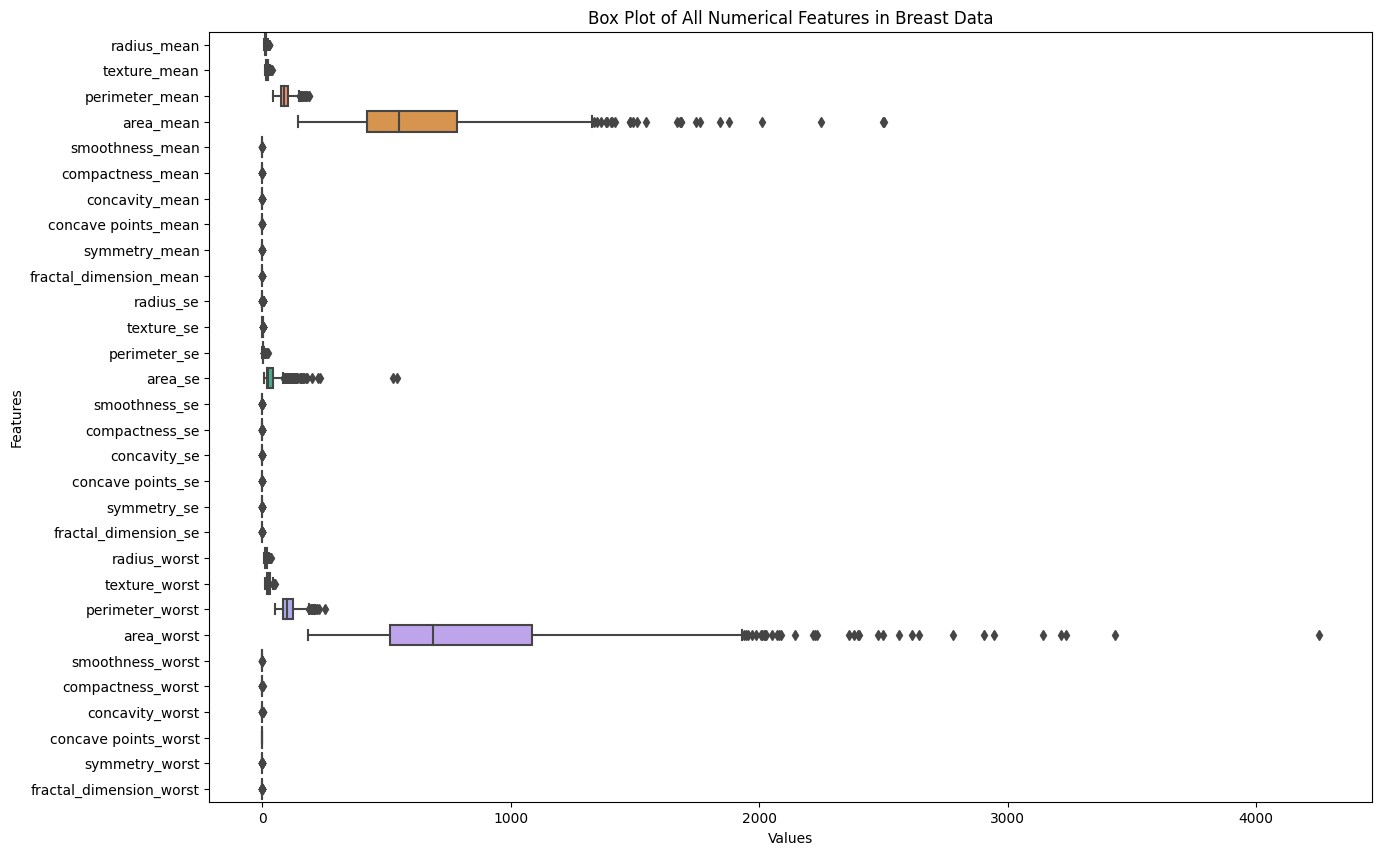

In [13]:
# Create a box plot for all numerical columns
plt.figure(figsize=(15, 10))  # Set figure size
sns.boxplot(data=BreastData, orient="h")  # Horizontal box plot
plt.title('Box Plot of All Numerical Features in Breast Data')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [14]:
# Display the shape of the original and cleaned DataFrames
print(f"Original DataFrame shape: {BreastData.shape}")
print(f"Cleaned DataFrame shape: {BreastData_cleaned.shape}")

Original DataFrame shape: (569, 31)
Cleaned DataFrame shape: (398, 31)


## Encoding

In [15]:
BreastData_cleaned['diagnosis'] = BreastData_cleaned['diagnosis'].apply(lambda val:1 if val =='M' else 0)

In [16]:
BreastData_cleaned['diagnosis'].value_counts()

diagnosis
0    300
1     98
Name: count, dtype: int64

In [17]:
BreastData['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Correlation Matrix

In [18]:
correlation_matrix = BreastData_cleaned.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.680705,0.388596,0.695835,0.698005,0.271570,0.514346,0.710567,0.752190,0.243588,...,0.761081,0.437909,0.768194,0.773626,0.396847,0.533996,0.653300,0.726639,0.347406,0.290821
radius_mean,0.680705,1.000000,0.280796,0.998113,0.992047,0.055311,0.442360,0.658031,0.755607,0.075653,...,0.971286,0.273847,0.964851,0.957772,0.087209,0.416464,0.563240,0.682235,0.137655,-0.014583
texture_mean,0.388596,0.280796,1.000000,0.285880,0.288688,-0.046879,0.181078,0.295111,0.239147,0.051037,...,0.311152,0.914721,0.316562,0.317755,0.069886,0.216026,0.274070,0.238186,0.076977,0.060915
perimeter_mean,0.695835,0.998113,0.285880,1.000000,0.990235,0.093196,0.492915,0.696240,0.785954,0.102371,...,0.972912,0.280552,0.971558,0.959710,0.121237,0.460901,0.599672,0.712906,0.160178,0.027877
area_mean,0.698005,0.992047,0.288688,0.990235,1.000000,0.058280,0.428703,0.664847,0.758145,0.077918,...,0.969353,0.280953,0.962721,0.971053,0.102255,0.400703,0.559618,0.671695,0.136700,-0.014754
smoothness_mean,0.271570,0.055311,-0.046879,0.093196,0.058280,1.000000,0.675183,0.463982,0.522678,0.494062,...,0.122928,0.020158,0.146367,0.125280,0.803945,0.432375,0.372220,0.463910,0.375969,0.504310
compactness_mean,0.514346,0.442360,0.181078,0.492915,0.428703,0.675183,1.000000,0.837473,0.805062,0.470457,...,0.487260,0.203987,0.543912,0.471562,0.588434,0.861979,0.780565,0.784528,0.424398,0.656342
concavity_mean,0.710567,0.658031,0.295111,0.696240,0.664847,0.463982,0.837473,1.000000,0.930271,0.365858,...,0.697135,0.323000,0.737467,0.701045,0.490384,0.772677,0.904941,0.861916,0.363584,0.470354
concave points_mean,0.752190,0.755607,0.239147,0.785954,0.758145,0.522678,0.805062,0.930271,1.000000,0.365482,...,0.792484,0.272741,0.816780,0.790517,0.509263,0.692292,0.794996,0.908179,0.360800,0.381099
symmetry_mean,0.243588,0.075653,0.051037,0.102371,0.077918,0.494062,0.470457,0.365858,0.365482,1.000000,...,0.128278,0.079260,0.148892,0.128689,0.381236,0.339391,0.292389,0.316389,0.675715,0.298244


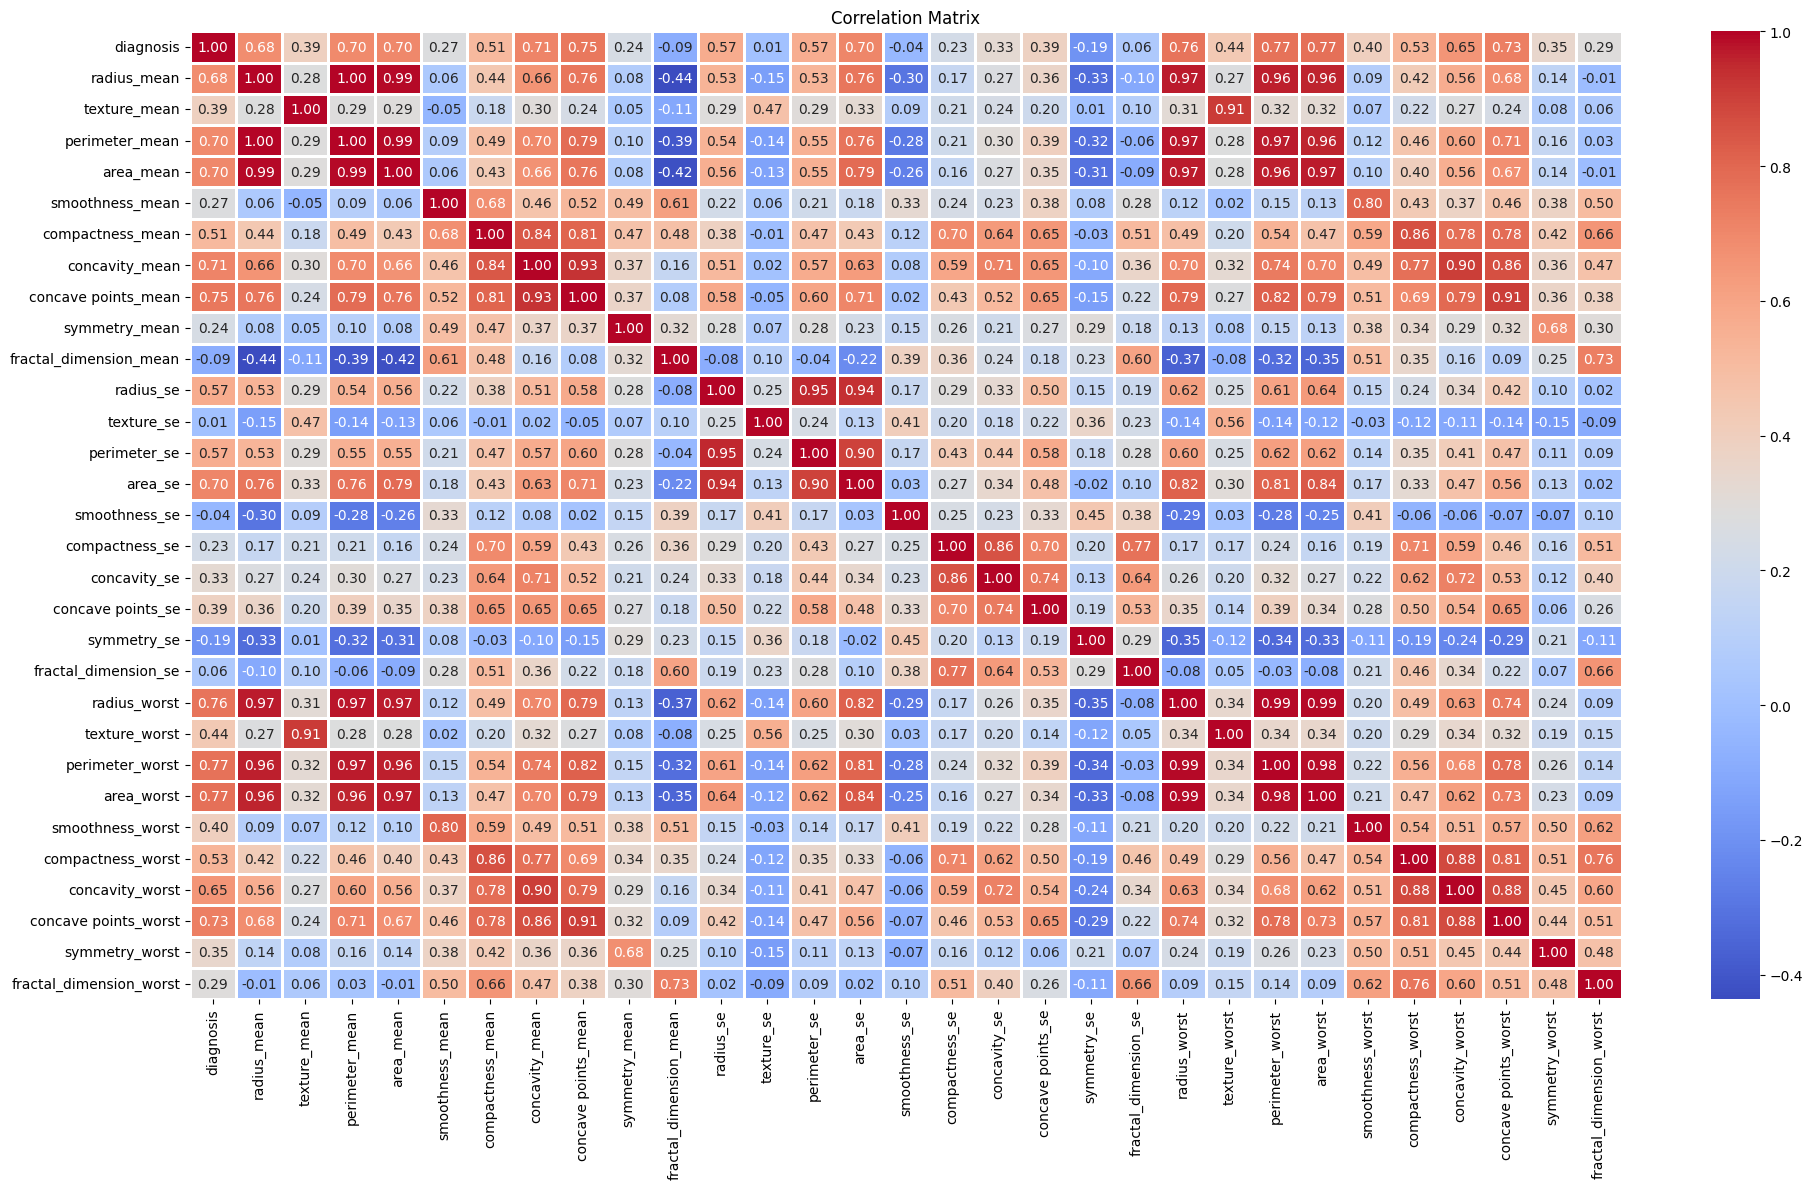

In [19]:
#heatmap
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, linewidths=1, annot=True, fmt = ".2f",cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Splitting Data

In [20]:
X = BreastData_cleaned.drop(['diagnosis'],axis = 1)
y = BreastData_cleaned['diagnosis']

In [21]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

## Scaling

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Models

In [23]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

In [24]:
results= {}
for name , clf in classifiers.items() : 
     clf.fit(X_train, y_train)  # Train the classifier
     y_pred = clf.predict(X_test)  # Make prediction
     print(f"Predictions of {name} : {y_pred}\n")
     # Calculate accuracy
     accuracy = accuracy_score(y_test, y_pred)
     results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, zero_division=0)}

Predictions of Logistic Regression : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1]

Predictions of Support Vector Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of K-Nearest Neighbors : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of Decision Tree Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0]

Predictions of Random Forest Classifier : [0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0

##  Display results

In [25]:
for name, metrics in results.items():    
    print(f"### {name} ###")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")

### Logistic Regression ###
Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.96      0.88      0.92        25

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



### Support Vector Classifier ###
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.88      0.94        25

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



### K-Nearest Neighbors ###
Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00

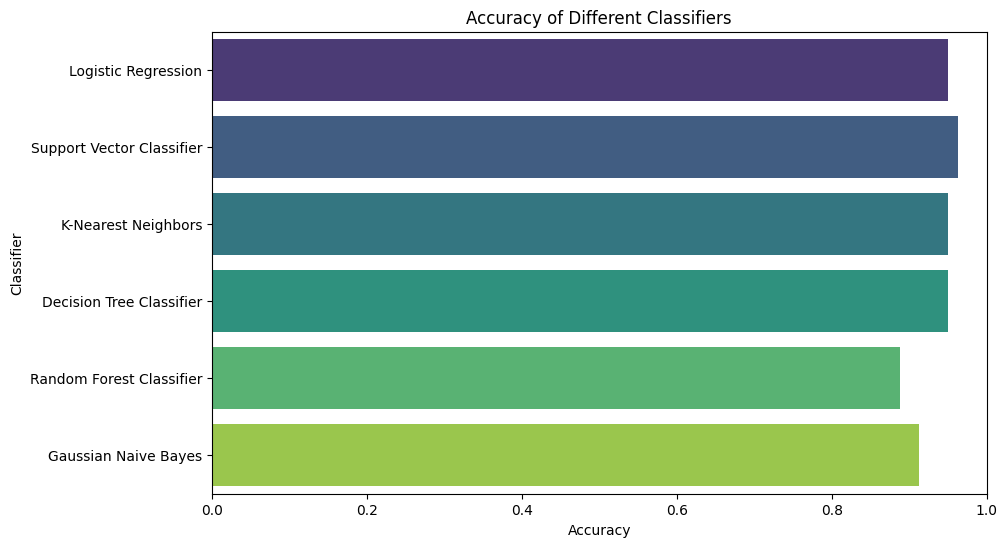

In [26]:
# Visualization of classifier accuracy
classifier_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in classifier_names]

# Create a DataFrame for visualization
accuracy_data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracy using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=accuracy_data, palette='viridis')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

## Find the best classifier based on accuracy

In [27]:
best_classifier_name = max(results, key=lambda name: results[name]['Accuracy'])
print(f"\nBest Classifier: {best_classifier_name}")


Best Classifier: Support Vector Classifier


In [28]:
best_model = classifiers[best_classifier_name]
best_model.fit(X_train, y_train)

SVC()

In [29]:
y_pred_best = best_model.predict(X_test)
y_pred_best

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [30]:
print(f"Classification Report for {best_classifier_name}:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.88      0.94        25

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



In [31]:
best_classifier_accuracy = results[best_classifier_name]['Accuracy']
print(f"Accuracy: {best_classifier_accuracy*100:.2f}%\n")

Accuracy: 96.25%



## Save

In [32]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'svc_model.pkl')

['svc_model.pkl']